In [1]:
# Data Manupulation
import numpy as np
import pandas as pd
# Plotting graphs
import matplotlib.pyplot as plt

# CSV File - Read
df = pd.read_csv('C:\\Users\\HP\\Downloads\\cereals.csv')
#  ,header=None ,skiprows=1 , names=['Cal', 'Pr', 'Fat', 'sod', 'Fib', 'Rting']
print(df.head(5)) 
print(df.ndim)
print(df.shape)

                        name mfr type  calories  protein  fat  sodium  fiber  \
0                  100%_Bran   N    C        70        4    1     130   10.0   
1          100%_Natural_Bran   Q    C       120        3    5      15    2.0   
2                   All-Bran   K    C        70        4    1     260    9.0   
3  All-Bran_with_Extra_Fiber   K    C        50        4    0     140   14.0   
4             Almond_Delight   R    C       110        2    2     200    1.0   

   carbo  sugars  potass  vitamins  shelf  weight  cups     rating  
0    5.0       6     280        25      3     1.0  0.33  68.402973  
1    8.0       8     135         0      3     1.0  1.00  33.983679  
2    7.0       5     320        25      3     1.0  0.33  59.425505  
3    8.0       0     330        25      3     1.0  0.50  93.704912  
4   14.0       8      -1        25      3     1.0  0.75  34.384843  
2
(74, 16)


In [2]:
newdf = df.loc[:,['calories','protein','fat','sodium','fiber','carbo','sugars','potass','vitamins','rating']]
print(newdf.head())

   calories  protein  fat  sodium  fiber  carbo  sugars  potass  vitamins  \
0        70        4    1     130   10.0    5.0       6     280        25   
1       120        3    5      15    2.0    8.0       8     135         0   
2        70        4    1     260    9.0    7.0       5     320        25   
3        50        4    0     140   14.0    8.0       0     330        25   
4       110        2    2     200    1.0   14.0       8      -1        25   

      rating  
0  68.402973  
1  33.983679  
2  59.425505  
3  93.704912  
4  34.384843  


In [5]:
import numpy as np
import statsmodels.api as sm 
import statsmodels.formula.api as smf
results = smf.ols('rating ~ calories + sugars', data=newdf).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     83.88
Date:                Sun, 03 Feb 2019   Prob (F-statistic):           2.00e-19
Time:                        02:20:24   Log-Likelihood:                -256.38
No. Observations:                  74   AIC:                             518.8
Df Residuals:                      71   BIC:                             525.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     88.8505      5.658     15.704      0.0

In [45]:
df2 = newdf.corr()
#print(df2)
x = df2.loc['rating']
print(x)
import pandasql as ps
q1 = "select * FROM x"

print(ps.sqldf(q1))
    



calories   -0.712054
protein     0.504070
fat        -0.407215
sodium     -0.409548
fiber       0.600230
carbo       0.055804
sugars     -0.760031
potass      0.410556
vitamins   -0.243780
rating      1.000000
Name: rating, dtype: float64
     rating
0 -0.712054
1  0.504070
2 -0.407215
3 -0.409548
4  0.600230
5  0.055804
6 -0.760031
7  0.410556
8 -0.243780
9  1.000000


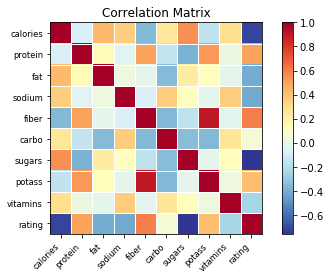

In [6]:
import statsmodels.graphics.api as smg
corr_matrix = np.corrcoef(newdf.T)
smg.plot_corr(corr_matrix, xnames=newdf.columns)
plt.show()


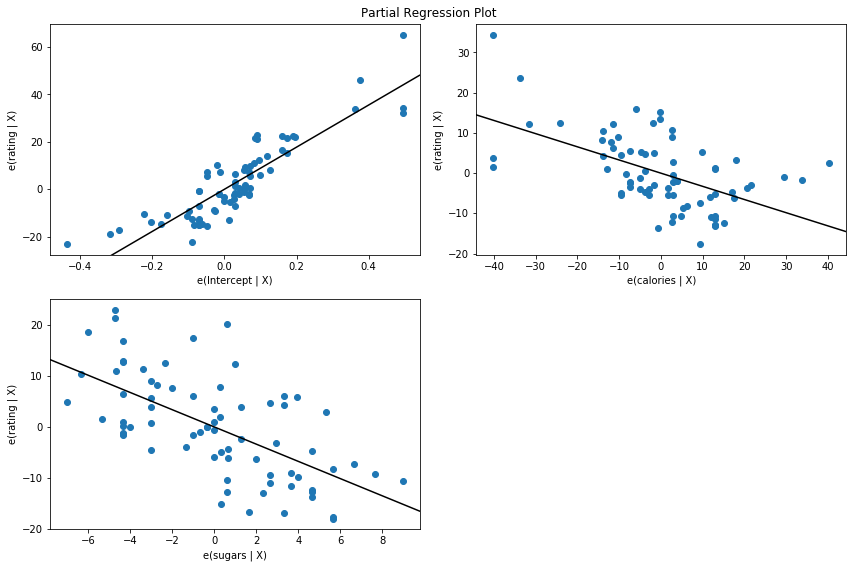

In [7]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(results, fig=fig)